In [1]:
from pathlib import Path


import orchest
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

Populating the interactive namespace from numpy and matplotlib


In [2]:
def horizontal_imgs_figure(imgs):
    fig = figure(figsize=(30, 25))
    n = len(imgs)
    for i in range(n):
        a=fig.add_subplot(1, n, i+1)
        imshow(imgs[i],cmap='Greys_r')
        axis('off')

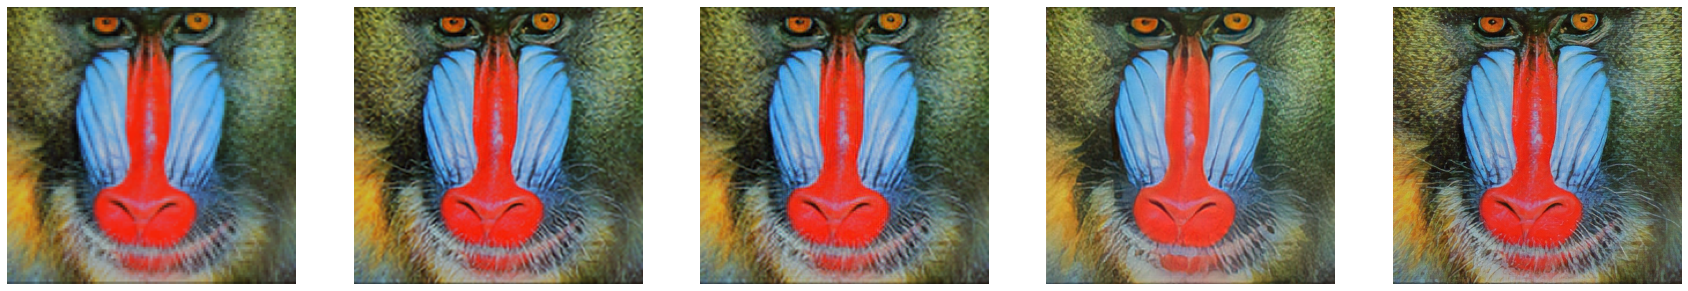

In [3]:
input_data = orchest.get_inputs()

# create a results directory for each model
models = ["psnr-small", "psnr-large", "noise-cancel", "gans"]
models_output_dirs = [Path(f"/data/isr/output_images/{model}") for model in models]
for model_dir in models_output_dirs:
    model_dir.mkdir(parents=True, exist_ok=True)

input_images = input_data["input-images"]
psnr_small_output = input_data["psnr-small-output"]
psnr_large_output = input_data["psnr-large-output"]
noise_cancel_output = input_data["noise-cancel-output"]
gans_output = input_data["gans-output"]
results = zip(input_images, psnr_small_output, psnr_large_output, noise_cancel_output, gans_output)

# go through the list of output imgs
# the name needs to be read only once, hence the different "_"
for (name, original), (_, small), (_, large), (_, noise_cancel), (_, gans) in results:
    
    # save each image to the right directory
    models_results = [small, large, noise_cancel, gans]
    for model_dir, model_result in zip(models_output_dirs, models_results):
        Image.fromarray(model_result).save(model_dir / name)
        
    horizontal_imgs_figure([original, small, large, noise_cancel, gans])


